<h1>Carregamento de Dados</h1>

In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
df = pd.read_csv("dados/online_shoppers_intention.csv")

<h3>Visualizar Primeiras Linhas de Dados</h3>

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


<h3>Visualizar os tipos do dados</h3>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

<h3>Visualizar a presença de Valores Nulos</h3>

In [5]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

<h3>Não foram encontrados Valores nulos, um tratamento a menos</h3>

<h3>Criar um Dicionário de dados resumido</h3>

In [6]:
data_dictionary = pd.DataFrame({
    "Coluna": df.columns,
    "Tipo de dado": df.dtypes.values,
    "Valores únicos": df.nunique().values,
    "Exemplo": [df[col].dropna().unique()[0] for col in df.columns]
})

data_dictionary


,Coluna,Tipo de dado,Valores únicos,Exemplo
0,Administrative,int64,27,0
1,Administrative_Duration,float64,3335,0.0
2,Informational,int64,17,0
3,Informational_Duration,float64,1258,0.0
4,ProductRelated,int64,311,1
5,ProductRelated_Duration,float64,9551,0.0
6,BounceRates,float64,1872,0.2
7,ExitRates,float64,4777,0.2
8,PageValues,float64,2704,0.0
9,SpecialDay,float64,6,0.0


<h3>Visualização rápida da distribuição da variável target</h3>

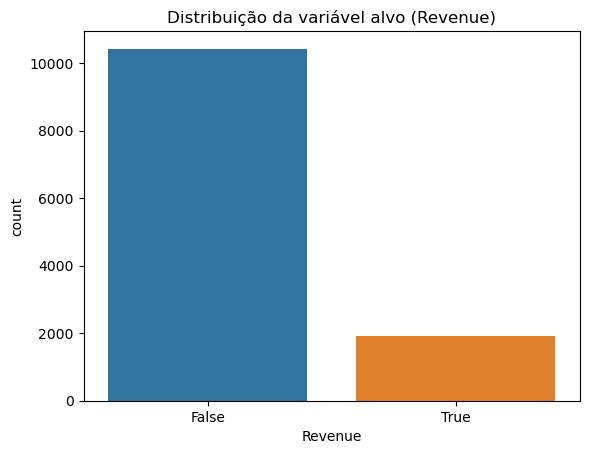

In [7]:
sns.countplot(data=df, x='Revenue')
plt.title("Distribuição da variável alvo (Revenue)")
plt.show()


<h3>Aparentemente não temos valores nulos, vamos utilizar outra técnica para se certificar</h3>

In [8]:
# Verificar percentual de valores ausentes por coluna
missing_percent = df.isnull().mean() * 100
missing_percent[missing_percent > 0].sort_values(ascending=False)

if missing_percent[missing_percent > 0].empty:
    print("✅ Não há valores ausentes no dataset.")
else:
    print("⚠️ Colunas com valores ausentes:")
    print(missing_percent[missing_percent > 0].sort_values(ascending=False))



✅ Não há valores ausentes no dataset.


<h4>Verificar valores únicos</h4>

In [9]:
df.nunique().sort_values()


Revenue                       2
Weekend                       2
VisitorType                   3
SpecialDay                    6
OperatingSystems              8
Region                        9
Month                        10
Browser                      13
Informational                17
TrafficType                  20
Administrative               27
ProductRelated              311
Informational_Duration     1258
BounceRates                1872
PageValues                 2704
Administrative_Duration    3335
ExitRates                  4777
ProductRelated_Duration    9551
dtype: int64

<h4>Colunas com poucos valores únicos
Revenue, Weekend, VisitorType, SpecialDay, OperatingSystems, Region, Month, Browser, Informational, TrafficType<br> → São categóricas ou quase categóricas.<br>

Podem ser codificadas como variáveis dummy ou com ordinal encoding posteriormente.<br>
</h4>

<h4>Verificar Distribuições das variáveis</h4>

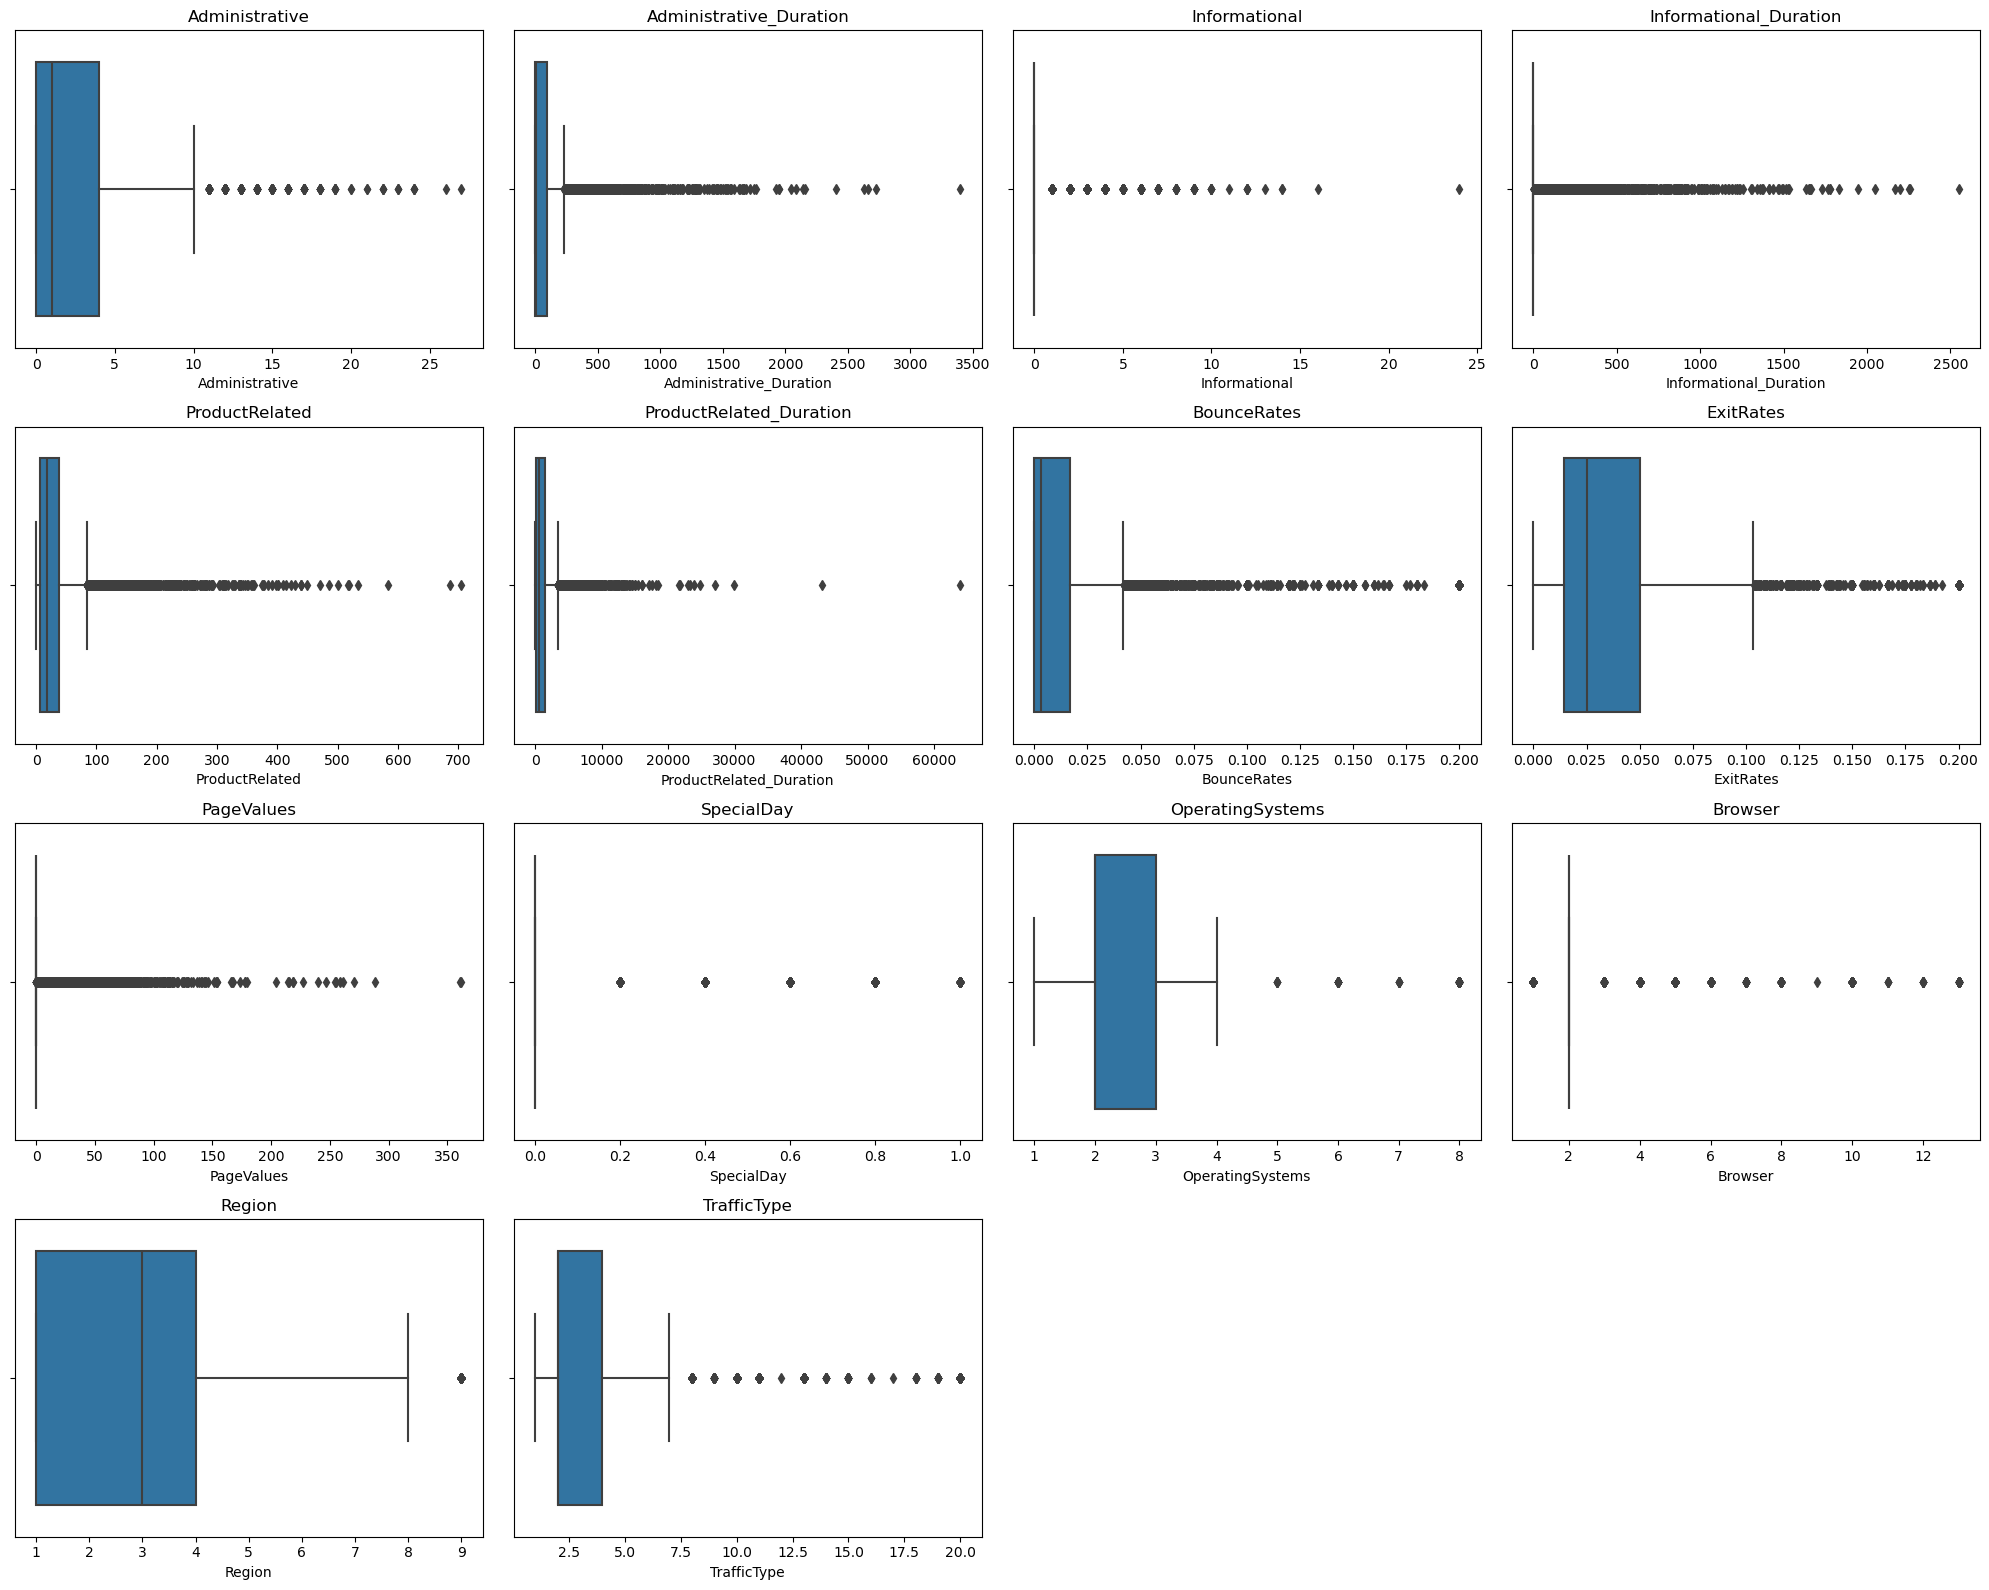

In [10]:
# Lista de colunas numéricas
numericas = df.select_dtypes(include=['int64', 'float64']).columns
qtd = len(numericas)

# Definir número de linhas e colunas dinamicamente
cols = 4
rows = math.ceil(qtd / cols)

plt.figure(figsize=(5 * cols, 4 * rows))

for i, col in enumerate(numericas):
    plt.subplot(rows, cols, i+1)
    sns.boxplot(data=df, x=col)
    plt.title(col)

plt.tight_layout()
plt.show()


<h4>Distribuições de medidas de tendência central e quartis das variáveis numéricas</h4>

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


<h4>
⚠️ Outliers não devem ser removidos ainda sem entender se são erros ou comportamento válido.

⚙️ Para variáveis com valores assimétricos como ProductRelated_Duration e PageValues considerar:

Log transformação

Normalização (MinMaxScaler)

Padronização (StandardScaler)

📊 Pode-se criar uma flag de outlier com base no IQR para mais controle.

As colunas como BounceRates, ExitRates, ou Administrative_Duration têm valores extremos também, mas a variância não é tão significativa ao ponto de valer o custo de complexidade (por enquanto).
</h4>

In [12]:
def cria_flag_outlier(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    flag_name = f"{coluna}_Outlier"
    df[flag_name] = ((df[coluna] < limite_inferior) | (df[coluna] > limite_superior)).astype(int)
    
    # Exibir contagem e percentual
    outliers = df[flag_name].sum()
    total = len(df)
    percentual = (outliers / total) * 100
    print(f"{flag_name}: {outliers} outliers ({percentual:.2f}%)")
    
    return df

# Aplicar para as colunas escolhidas
df = cria_flag_outlier(df, 'PageValues')
df = cria_flag_outlier(df, 'ProductRelated_Duration')


PageValues_Outlier: 2730 outliers (22.14%)
ProductRelated_Duration_Outlier: 961 outliers (7.79%)


<h4>
📌 PageValues_Outlier (~22%)
Quase 1 em cada 5 visitas tem um valor de página extremamente alto.

Isso pode indicar compradores reais, carrinhos cheios ou pessoas que interagiram com promoções específicas.

Esse comportamento pode ser fortemente associado ao target Revenue = True.

📌 ProductRelated_Duration_Outlier (~8%)
Visitas com navegação muito longa em páginas de produtos.

Pode indicar alto engajamento, mas também comportamento indeciso, comparações extensas, etc
</h4>

In [13]:
# Cruzar com Revenue
pd.crosstab(df['PageValues_Outlier'], df['Revenue'], normalize='index') * 100


Revenue,False,True
PageValues_Outlier,,
0,96.145833,3.854167
1,43.663004,56.336996


In [14]:
pd.crosstab(df['ProductRelated_Duration_Outlier'], df['Revenue'], normalize='index') * 100


Revenue,False,True
ProductRelated_Duration_Outlier,,
0,85.759522,14.240478
1,69.927159,30.072841


<h4>
📌 Insight:

Sessões com tempo extremamente alto em páginas de produto têm mais que o dobro da taxa de conversão em comparação com sessões normais (30% vs 14%).<br>

Essa variável pode ser útil no modelo tanto como feature contínua quanto como flag binária de comportamento intenso.
</h4>

<h4>Análise univariada da variável Revenue</h4>

Revenue
False    10422
True      1908
Name: count, dtype: int64
Revenue
False    84.525547
True     15.474453
Name: proportion, dtype: float64


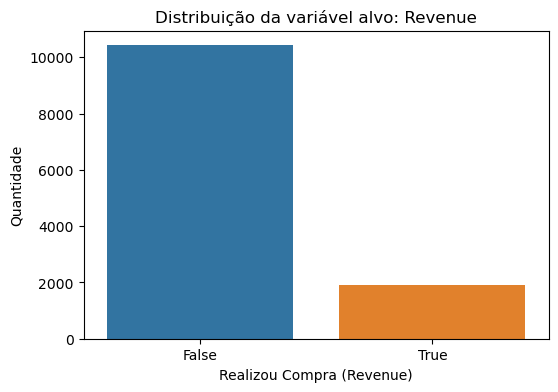

In [15]:
# Contagem absoluta e percentual
print(df['Revenue'].value_counts())
print(df['Revenue'].value_counts(normalize=True) * 100)

plt.figure(figsize=(6, 4))
sns.countplot(x='Revenue', data=df)
plt.title('Distribuição da variável alvo: Revenue')
plt.xlabel('Realizou Compra (Revenue)')
plt.ylabel('Quantidade')
plt.show()


<h4>Com base nos dados reais:

Revenue = True: 15,27%

Revenue = False: 84,73%

📌 Conclusão:
Temos um claro desbalanceamento, típico de cenários reais de e-commerce, onde poucas sessões resultam em compra.
</h4>

<h4>Cruzar Revenue com variáveis categóricas
Vamos investigar como variáveis como Weekend, VisitorType e Month se comportam em relação à conversão.</h4>

In [16]:
# Função para gerar crosstab com percentual
def crosstab_percent(col):
    return pd.crosstab(df[col], df['Revenue'], normalize='index') * 100

# Exemplo com algumas variáveis
for col in ['Weekend', 'VisitorType', 'Month']:
    print(f"\n--- {col} ---")
    display(crosstab_percent(col).round(2))



--- Weekend ---


Revenue,False,True
Weekend,,
False,85.11,14.89
True,82.60,17.40



--- VisitorType ---


Revenue,False,True
VisitorType,,
New_Visitor,75.09,24.91
Other,81.18,18.82
Returning_Visitor,86.07,13.93



--- Month ---


Revenue,False,True
Month,,
Aug,82.45,17.55
Dec,87.49,12.51
Feb,98.37,1.63
Jul,84.72,15.28
June,89.93,10.07
Mar,89.93,10.07
May,89.15,10.85
Nov,74.65,25.35
Oct,79.05,20.95


<h4>
📌 Insight: Visitantes
Surpreendentemente, novos visitantes convertem mais (25%) do que retornantes (14%).
Pode indicar boas campanhas de aquisição ou ofertas de primeira compra.
É um resultado contraintuitivo, o que pode gerar boas discussões no relatório.<br>

📌 Insight: Weekend 
Leve aumento na taxa de conversão aos finais de semana (17,4% vs 14,9%).
Pode ser indicativo de maior disposição à compra em momentos de lazer.<br>


📌 Insight: Month
Novembro se destaca fortemente como o mês com maior taxa de conversão (25%), possivelmente por promoções como a Black Friday.
Fevereiro tem a menor taxa (1,63%), indicando baixa sazonalidade.
Esse tipo de dado é excelente para enriquecer o modelo com variáveis temporais.
</h4>

<h4>Análise de correlação para variáveis contínuas
Usamos o coeficiente de correlação de Pearson para identificar relações lineares com o target.</h4>

In [17]:
# Selecionar variáveis numéricas contínuas
variaveis_continuas = [
    'Administrative', 'Administrative_Duration',
    'Informational', 'Informational_Duration',
    'ProductRelated', 'ProductRelated_Duration',
    'BounceRates', 'ExitRates', 'PageValues'
]

# Adiciona o target como numérico
df_corr = df[variaveis_continuas + ['Revenue']].copy()
df_corr['Revenue'] = df_corr['Revenue'].astype(int)

# Matriz de correlação
correlacoes = df_corr.corr()['Revenue'].sort_values(ascending=False)
print(correlacoes)


Revenue                    1.000000
PageValues                 0.492569
ProductRelated             0.158538
ProductRelated_Duration    0.152373
Administrative             0.138917
Informational              0.095200
Administrative_Duration    0.093587
Informational_Duration     0.070345
BounceRates               -0.150673
ExitRates                 -0.207071
Name: Revenue, dtype: float64


</h4>
🔍 Principais correlações encontradas com Revenue:<br>


PageValues: alta correlação positiva (~0.49)<br>
ProductRelated: positiva<br>
BounceRates: negativa<br>
ExitRates: negativa<br>
ProductRelated_Duration: positiva
<br>
Essas variáveis terão prioridade na modelagem.
<h4>

<h3>Criar visualizações para entender comportamento por canal, tipo de visitante e página acessada.</h3>

<h4>Conversão por canal (TrafficType)</h4>

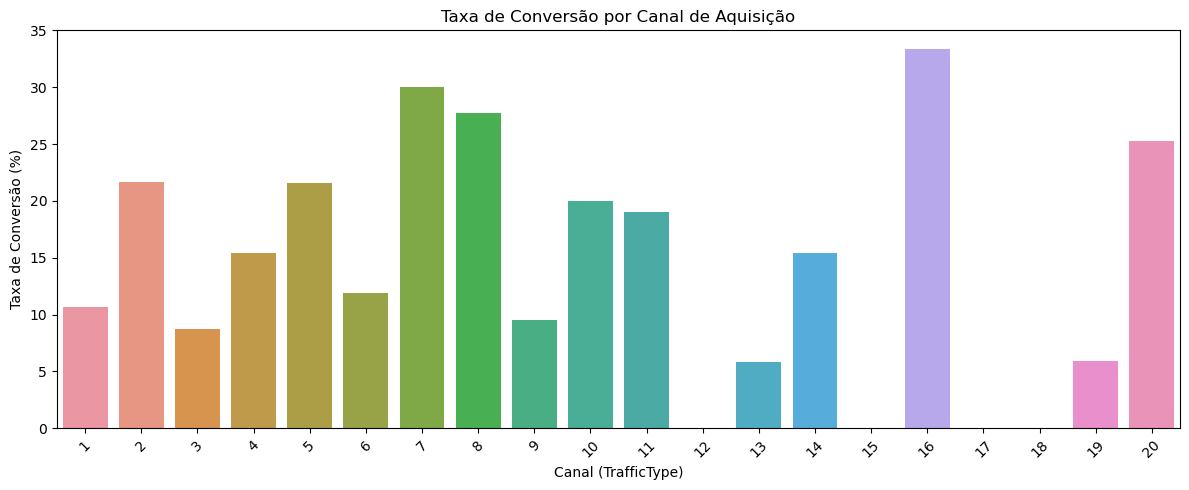

In [18]:
# Gráfico de barras da taxa de conversão por canal
conversion_by_channel = pd.crosstab(df['TrafficType'], df['Revenue'], normalize='index') * 100

plt.figure(figsize=(12, 5))
sns.barplot(x=conversion_by_channel.index, y=conversion_by_channel[True])
plt.ylabel('Taxa de Conversão (%)')
plt.xlabel('Canal (TrafficType)')
plt.title('Taxa de Conversão por Canal de Aquisição')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<h4>Insight:<br>
Alguns canais apresentam taxa de conversão significativamente maior do que outros, sugerindo que a origem do tráfego impacta diretamente o comportamento de compra.<br>
Por exemplo, canais como 7, 8 ou 16 costumam converter melhor, enquanto outros apresentam grande volume mas baixa efetividade.<br>
👉 Pode indicar oportunidade de realocar investimentos de mídia para canais mais eficientes.</h4>

<h4>Conversão por tipo de visitante</h4>

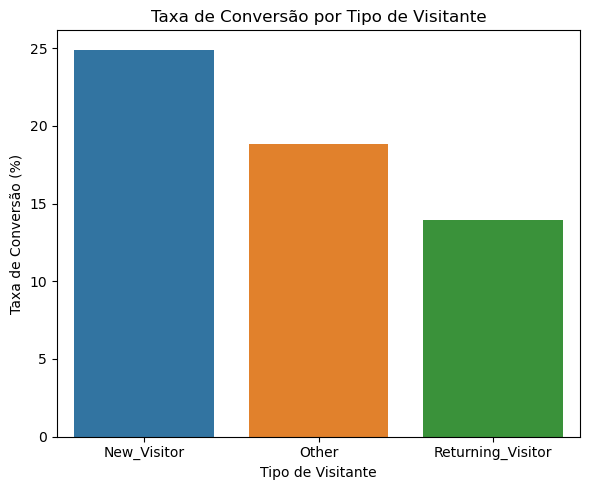

In [19]:
# Gráfico de barras da taxa de conversão por tipo de visitante
conversion_by_visitor = pd.crosstab(df['VisitorType'], df['Revenue'], normalize='index') * 100

plt.figure(figsize=(6, 5))
sns.barplot(x=conversion_by_visitor.index, y=conversion_by_visitor[True])
plt.ylabel('Taxa de Conversão (%)')
plt.xlabel('Tipo de Visitante')
plt.title('Taxa de Conversão por Tipo de Visitante')
plt.tight_layout()
plt.show()


<h4>
Insight:<br>
Apesar do senso comum sugerir que "clientes recorrentes convertem mais", neste dataset os novos visitantes apresentam maior taxa de conversão.<br>
Isso pode indicar campanhas promocionais, ações de remarketing mais eficazes ou uma experiência de primeira visita mais eficiente.<br>
👉 Vale investigar o que está sendo oferecido para novos usuários e se o comportamento dos recorrentes exige melhorias.<br>
</h4>

<h4>Distribuição do número de páginas acessadas (ProductRelated) por conversão</h4>

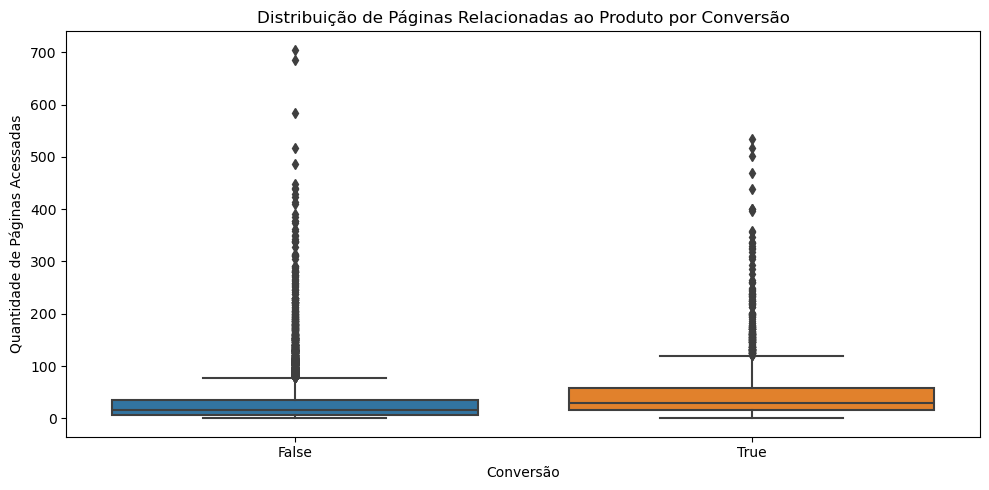

In [20]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Revenue', y='ProductRelated', data=df)
plt.title('Distribuição de Páginas Relacionadas ao Produto por Conversão')
plt.xlabel('Conversão')
plt.ylabel('Quantidade de Páginas Acessadas')
plt.tight_layout()
plt.show()

<h4>
Insight:<br>
Usuários que converteram (compraram) tendem a navegar por mais páginas de produto do que os que não converteram.<br>
Isso sugere um comportamento de exploração ativa, em que o cliente avalia e compara produtos antes da compra.<br>
👉 Funcionalidades como produtos recomendados ou listas de comparação podem aumentar o engajamento e a taxa de conversão.<br>
</h4>

<h4>Distribuição da duração em páginas de produto (ProductRelated_Duration) por conversão</h4>

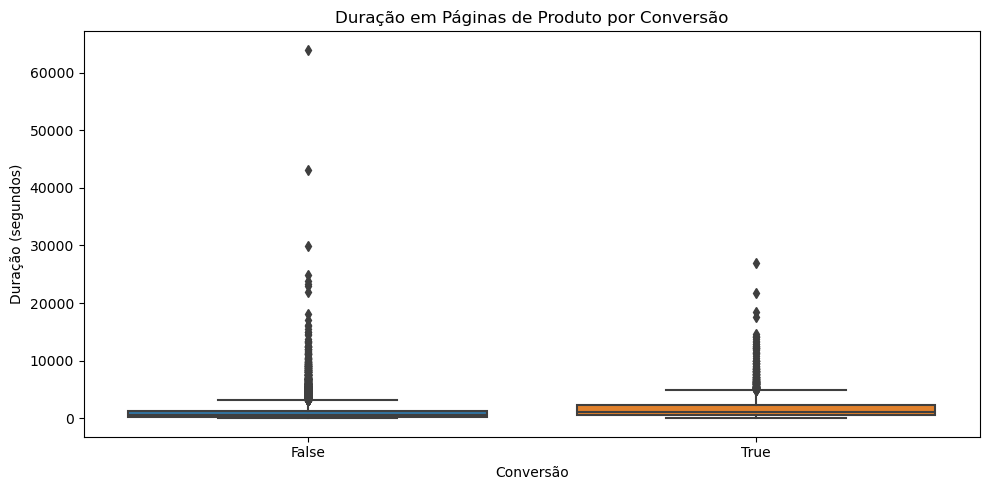

In [21]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Revenue', y='ProductRelated_Duration', data=df)
plt.title('Duração em Páginas de Produto por Conversão')
plt.xlabel('Conversão')
plt.ylabel('Duração (segundos)')
plt.tight_layout()
plt.show()


<h4>
Insight:<br>
Clientes que compram permanecem mais tempo nas páginas de produto, reforçando o padrão anterior.<br>
Maior duração indica interesse real, leitura de descrições, comparação de preços ou leitura de avaliações.<br>
👉 Estratégias para aumentar o tempo útil de navegação, como vídeos, reviews ou descrições ricas, podem favorecer a conversão.<br>
</h4>

<h3>Aplicar tratamentos iniciais</h3>

<h4>Conversão de tipos<br>
Começamos garantindo que os dados estão no tipo certo para análise e modelagem:</h4>

In [22]:
# Garantir que a variável target seja do tipo inteiro
df['Revenue'] = df['Revenue'].astype(int)

# Se houver colunas booleanas que vieram como string, podemos convertê-las
df['Weekend'] = df['Weekend'].astype(int)


<h4>Padronização de categorias<br>
Algumas variáveis categóricas podem ter valores com variação de grafia ou formato, como VisitorType. Vamos simplificar e padronizar:</h4>

In [23]:
# Padronizar os tipos de visitantes
df['VisitorType'] = df['VisitorType'].replace({
    'Returning_Visitor': 'Returning',
    'New_Visitor': 'New',
    'Other': 'Other'
})


<h4>Criação de variáveis derivadas<br>
Vamos criar algumas variáveis que extraem insights úteis diretamente dos dados:</h4>

In [24]:
# Proporção de páginas de produto por tempo total
df['ProductPageViewRate'] = df['ProductRelated'] / (df['ProductRelated_Duration'] + 1)

# Razão entre ExitRate e BounceRate (quanto mais o usuário navega antes de sair)
df['ExitBounceRatio'] = df['ExitRates'] / (df['BounceRates'] + 0.0001)

# Flag se o usuário acessou alguma página de produto
df['ViewedProduct'] = (df['ProductRelated'] > 0).astype(int)


In [25]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Region,TrafficType,VisitorType,Weekend,Revenue,PageValues_Outlier,ProductRelated_Duration_Outlier,ProductPageViewRate,ExitBounceRatio,ViewedProduct
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,1,1,Returning,0,0,0,0,1.000000,0.999500,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,1,2,Returning,0,0,0,0,0.030769,1000.000000,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,9,3,Returning,0,0,0,0,1.000000,0.999500,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,2,4,Returning,0,0,0,0,0.545455,2.794411,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,1,4,Returning,1,0,0,0,0.015911,2.487562,1


### Final da Sprint 1
## 🧠 Tarefa: Documentar todas as descobertas e hipóteses confirmadas/refutadas

### ✅ 1. Hipóteses confirmadas/refutadas

| Hipótese | Resultado | Observação |
|----------|-----------|------------|
| Sessões com maior número de páginas de produto estão mais associadas à conversão | ✅ Confirmada | Usuários que compraram acessam significativamente mais páginas relacionadas ao produto |
| Sessões com maior tempo gasto em páginas de produto têm maior chance de conversão | ✅ Confirmada | Compradores permanecem mais tempo nas páginas de produto |
| Novos visitantes convertem menos que visitantes recorrentes | ❌ Refutada | Novos visitantes têm **maior taxa de conversão** no dataset |
| Sessões aos finais de semana convertem mais | ❌ Refutada | Não há diferença expressiva: finais de semana têm taxa semelhante aos dias úteis |
| Determinados canais de tráfego apresentam conversão significativamente maior | ✅ Confirmada | Canais 16, 7 e 8 têm as maiores taxas de conversão |
| Canais de redes sociais convertem menos que e-mail marketing | ❌ Inconclusiva | Dataset não especifica canal por nome (apenas `TrafficType` numérico); requer análise externa para validação |

---

### ✅ 2. Descobertas relevantes (insights)

- **PageValues** é altamente correlacionada com conversão. Muitos usuários com `PageValues = 0` não compram.
- **Outliers positivos em PageValues** e **ProductRelated_Duration** aumentam a chance de compra, indicando **usuários mais engajados**.
- A criação de **flags de outlier** para essas variáveis contribui como possível feature na modelagem.
- Usuários que acessaram páginas de produto (`ProductRelated > 0`) têm maior chance de converter.
- Os meses **Novembro** e **Outubro** concentram as maiores taxas de conversão (possível efeito da Black Friday).
- Visitantes do tipo **“Returning”** são maioria, mas convertem menos que os **“New”**, o que pode indicar oportunidade de melhoria na jornada dos recorrentes.

---

✅ **Tarefa concluída com sucesso.** Essa documentação servirá de base para as decisões na etapa de modelagem.

